In [86]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,os,sys,time,datetime

import torch

import torchvision
from torch import nn
from torch.nn import functional as F

import pandas as pd

from sklearn.cluster import KMeans

from scipy import ndimage

In [45]:
def calc_entropy(arr,verbose=False,random_seed=-1,num_iter=1000):
    if random_seed>0: rnd.seed(random_seed)
    arr = arr.reshape(-1)

    entr_vec = []
    for k in range(num_iter):
        c_entropy = abs(rnd.permutation(arr) - arr).sum()/arr.shape[0]
        entr_vec.append(c_entropy)
    entropy = sum(entr_vec)/len(entr_vec)
    stat_confidence = 1/(num_iter*np.var(entr_vec - entropy))
    if verbose: print(entropy)
    return entropy,stat_confidence

In [3]:
def binarize_image(xx,verbose=False):
    o_shape = xx.shape
    xout = KMeans(n_clusters=2).fit_predict(xx.flatten().reshape(-1,1)).reshape(o_shape)
    if verbose:
        plt.imshow(xout)
        plt.show()
    return xout

In [64]:
def preprocessing_pipeline_images(X0):
    # Resize images to scale 0.5
    #X0 = ndimage.zoom(X0,[1,0.5,0.5])
    # Binarize image
    X0 = binarize_image(X0)
    
    # Return preprocessed images
    return X0

In [65]:
dataset = torchvision.datasets.MNIST(
    root='./../../../../../../../Dropbox/TF_data/MNIST/',
    download=True,
    train=True,
    transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))])
)

In [66]:
train_loader = torch.utils.data.DataLoader(dataset,shuffle=True,batch_size=100)

In [67]:
samples = enumerate(train_loader)
_,(X,y) = next(samples)

X0 = X.numpy().reshape(X.shape[0],X.shape[2],X.shape[3])
y0 = y.numpy()

In [68]:
X0 = preprocessing_pipeline_images(X0)

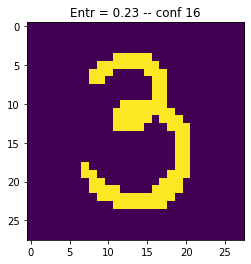

In [69]:
c_index = 74

img = X0[c_index]
entr,conf = calc_entropy(img)

plt.imshow(img)
plt.title('Entr = {0:.2f} -- conf {1:.0f}'.format(entr,conf))

plt.show()

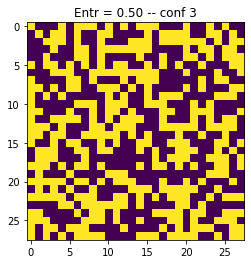

In [70]:
img = rnd.randint(2,size=X0[0].shape)

entr,conf = calc_entropy(img)

plt.imshow(img)
plt.title('Entr = {0:.2f} -- conf {1:.0f}'.format(entr,conf))

plt.show()

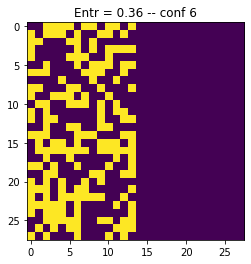

In [72]:
img = np.concatenate([rnd.randint(2,size=(X0[0].shape[0],14)),np.zeros(shape=(X0[0].shape[0],14))],axis=1)

entr,conf = calc_entropy(img)

plt.imshow(img)
plt.title('Entr = {0:.2f} -- conf {1:.0f}'.format(entr,conf))

plt.show()

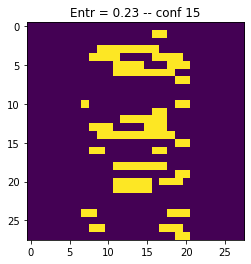

In [75]:
c_index = 74

img = rnd.permutation(X0[c_index])

entr,conf = calc_entropy(img)

plt.imshow(img)
plt.title('Entr = {0:.2f} -- conf {1:.0f}'.format(entr,conf))

plt.show()

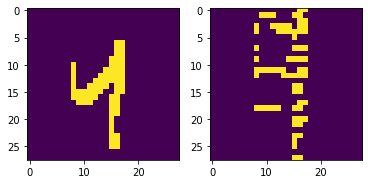

In [79]:
c_index = 50

img0 = X0[c_index]
img1 = rnd.permutation(X0[c_index])

plt.subplot(1,2,1)
plt.imshow(img0)
plt.subplot(1,2,2)
plt.imshow(img1)

plt.show()

In [122]:
class Net(nn.Module):
    # Init network
    def __init__(self):
        super(Net,self).__init__()
        # Conv layers
        self.conv1 = nn.Conv2d(1,6,(3,3))
        self.conv2 = nn.Conv2d(6,10,(3,3))
        # Dense layers
        self.dense1 = nn.Linear(250,64)
        self.dense2 = nn.Linear(64,2)
        # Output layers
        self.out_layer = nn.Linear(2,1)
    # Forward pass   
    def forward(self,x):
        # COnv layers
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.dropout(x,p=0.5) 
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.dropout(x,p=0.5) 
        # Flatten
        x = x.view(-1,250)
        # Dense layers
        x = F.relu(self.dense1(x))
        x = F.dropout(x,p=0.5)
        x = F.relu(self.dense2(x))
        x = torch.sigmoid(self.out_layer(x))
        return x

In [123]:
net = Net()

In [124]:
net(torch.tensor(X0[:2]).reshape(-1,1,28,28).float())

tensor([[0.6706],
        [0.6699]], grad_fn=<SigmoidBackward>)